Code to illustrate the concept of Bayesian histograms in Gelman et al., _Bayesian data analysis_, paragraph 2.3.1.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.stats import beta

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# mixture
a, b = 0.75, 0.25
m1 = beta(1, 5)
m2 = beta(20, 2)

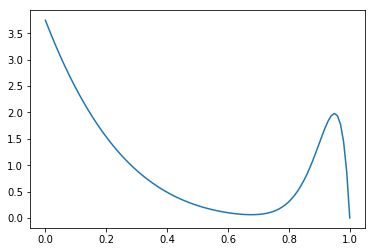

In [4]:
x = np.linspace(0, 1, 100)
y = a*m1.pdf(x) + b*m2.pdf(x)

plt.plot(x, y)

In [5]:
# Samples

from scipy.stats import multinomial

def draw_samples(n):
    dist = multinomial(1, [a, b])
    categories = dist.rvs(n)
    return (categories*np.column_stack([m1.rvs(n), m2.rvs(n)])).sum(axis=-1)

In [6]:
s = draw_samples(100)

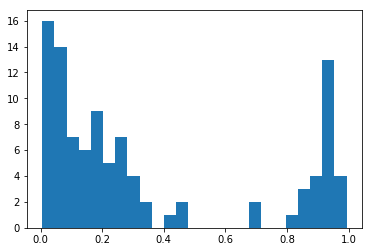

In [7]:
plt.hist(s, bins=25);

In [8]:
from scipy.stats import dirichlet

In [9]:
nbins = 25
bins = np.linspace(0, 1, nbins)
hyper = np.ones(nbins - 1)

counts = np.zeros_like(hyper, dtype=int)
idxs, vals = np.unique(np.digitize(s, bins, right=True) - 1, return_counts=True)
counts[idxs] += vals

hyper += counts

In [10]:
p = dirichlet(hyper).rvs()

In [11]:
def connected_holdplot(ax, bins, level_values, jitter=0, **params):
    lc = level_values / np.diff(bins)
    x = np.repeat(bins, 2)[1:-1] + jitter
    y = np.repeat(lc, 2)
    ax.plot(x, y, **params)

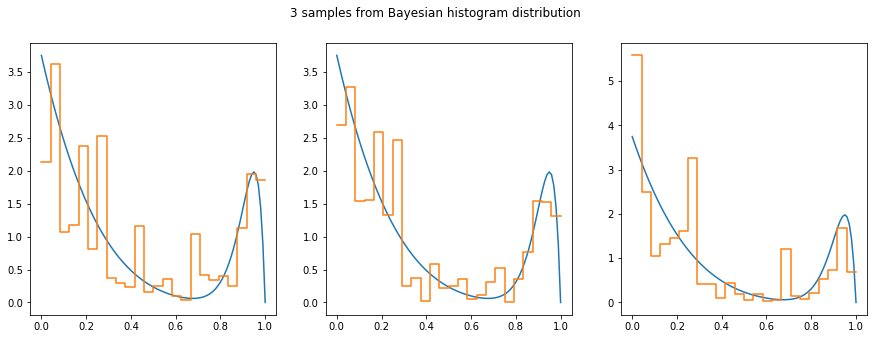

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for k in range(3):
    x = np.linspace(0, 1, 100)
    y = a*m1.pdf(x) + b*m2.pdf(x)
    axes[k].plot(x, y)
    
    p = dirichlet(hyper).rvs()
    connected_holdplot(axes[k], bins, p)

fig.suptitle("3 samples from Bayesian histogram distribution");

In [13]:
dirichlet(hyper).var()

array([  8.99063476e-04,   8.99063476e-04,   4.82830385e-04,
         4.26118626e-04,   6.99271592e-04,   3.09573361e-04,
         5.93132154e-04,   1.88865765e-04,   1.26951093e-04,
         6.39958377e-05,   1.88865765e-04,   1.26951093e-04,
         6.39958377e-05,   6.39958377e-05,   6.39958377e-05,
         6.39958377e-05,   1.88865765e-04,   6.39958377e-05,
         6.39958377e-05,   1.26951093e-04,   2.49739854e-04,
         3.09573361e-04,   8.01248699e-04,   3.09573361e-04])

In [14]:
def add_shaded_region(ax, bins, p_up, p_down, **kw):
    for i in range(len(p_up)):
        width = bins[i+1] - bins[i]
        height = (p_up[i] - p_down[i])/width
        ax.add_patch(
            patches.Rectangle((bins[i], p_down[i]/width), width, height, **kw)
        )

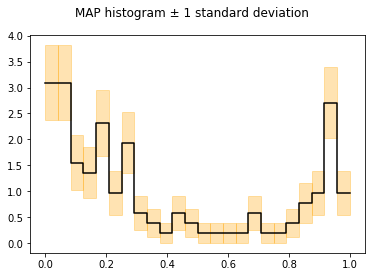

In [15]:
fig, ax = plt.subplots(1, 1)

p0 = dirichlet(hyper).mean()
ps = dirichlet(hyper).var() ** 0.5
p_up = p0 + ps
p_dn = p0 - ps

add_shaded_region(ax, bins, p_up, p_dn, color='orange', alpha=0.3)
connected_holdplot(ax, bins, p0, color='black')

fig.suptitle(u"MAP histogram \N{PLUS-MINUS SIGN} 1 standard deviation");